In [13]:
import pandas as pd
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

startTime = time.time()


df = pd.read_csv('mnist_train.csv')
X = df.drop(columns=['label'])
y = df['label']


#df.drop(df.index[500:59000], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier() 
model.fit(X_train, y_train)
predictions = model.predict(X_test)


score = accuracy_score(y_test, predictions)

endTime = time.time()


print (score)
print('Execution time in seconds: ' + str(endTime-startTime))

0.8641666666666666
Execution time in seconds: 19.697920083999634


In [14]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import itertools

In [15]:
answer = [1, 0, 9, 3, 4, 5, 7, 8, 4, 6, 7, 8, 3, 2, 1, 3, 0, 9, 3, 4, 5, 7, 8, 4, 6, 7, 8, 3, 2, 1]

prediction = [7, 0, 9, 8, 4, 5, 7, 8, 4, 6, 7, 8, 8, 3, 1, 3, 0, 0, 3, 4, 5, 1, 8, 4, 6, 7, 8, 3, 5, 1]

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1178
           1       0.94      0.95      0.95      1363
           2       0.87      0.83      0.85      1234
           3       0.82      0.81      0.82      1248
           4       0.86      0.84      0.85      1141
           5       0.82      0.81      0.81      1090
           6       0.89      0.89      0.89      1146
           7       0.89      0.90      0.89      1214
           8       0.79      0.82      0.81      1205
           9       0.83      0.84      0.83      1181

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

Confusion matrix, without normalization
[[1078    2   16   10    5   16   15   14   16    6]
 [   1 1299   11   10    5    8    3    3   18    5]
 [   7   19 1029   49   19   15   20   25   35   16]
 [   5   10   28 1015    5   63   12   20 

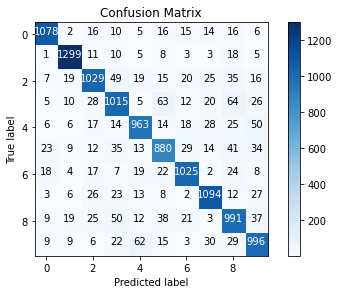

In [18]:
print(classification_report(y_test, predictions))
plot_confusion_matrix(cm=cm, classes=classes, title='Confusion Matrix')